In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the preprocessed Parquet file
file_path = "data/oro_transformed_gaps.parquet"
print(f"Loading dataset from {file_path}...")
df = pd.read_parquet(file_path)

# Ensure correct data types for analysis
numeric_cols = ["OPEN", "HIGH", "LOW", "CLOSE", "VOL", "OPENINT", "TIME_DIFF"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Extract date and hour for analysis
df['DATE_ONLY'] = df['DATETIME'].dt.date
df['HOUR_ONLY'] = df['DATETIME'].dt.hour


Loading dataset from data/oro_transformed_gaps.parquet...


In [4]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATETIME,TIME_DIFF,HOUR_ONLY
count,1.286556e+06,1.286556e+06,1.286556e+06,1.286556e+06,1.286556e+06,1286556.0,1286556,1.281801e+06,1.286556e+06
mean,1.430526e+03,1.431068e+03,1.429977e+03,1.430527e+03,5.470140e+02,0.0,2015-12-18 22:51:13.413531904,5.039077e+00,1.114463e+01
min,6.046000e+02,6.056000e+02,6.031000e+02,6.046000e+02,1.000000e+00,0.0,2006-12-04 00:05:00,4.000000e+00,0.000000e+00
25%,1.193900e+03,1.194400e+03,1.193500e+03,1.193900e+03,1.110000e+02,0.0,2011-06-15 07:38:45,5.000000e+00,5.000000e+00
50%,1.326300e+03,1.326700e+03,1.325900e+03,1.326300e+03,2.720000e+02,0.0,2015-12-08 08:47:30,5.000000e+00,1.100000e+01
75%,1.741800e+03,1.742500e+03,1.741100e+03,1.741800e+03,6.320000e+02,0.0,2020-06-24 11:26:15,5.000000e+00,1.700000e+01
max,2.801400e+03,2.801800e+03,2.800800e+03,2.801400e+03,3.926600e+04,0.0,2025-01-10 23:00:00,3.000000e+02,2.300000e+01
std,4.209261e+02,4.210511e+02,4.207976e+02,4.209267e+02,8.687846e+02,0.0,NaN,1.200498e+00,6.669263e+00


In [5]:
df['TIME_DIFF'][df["TIME_DIFF"] > 120].count

<bound method Series.count of 389914     240.0
441533     300.0
585279     299.0
656280     299.0
871160     185.0
955471     125.0
1075943    209.0
1191867    185.0
1207893    185.0
1217522    185.0
1224429    180.0
Name: TIME_DIFF, dtype: float64>

In [12]:
time_diff_counts = df["TIME_DIFF"].value_counts().sort_index()

# Print unique time differences and their counts
print("\nUnique Time Differences and Their Counts:")
print(time_diff_counts)


Unique Time Differences and Their Counts:
TIME_DIFF
4.0          389
5.0      1277174
9.0            2
10.0        2850
15.0         565
20.0         153
25.0          75
30.0         108
35.0          66
40.0           7
44.0          47
45.0         158
50.0           7
55.0           4
59.0          35
60.0          34
65.0         111
70.0           1
85.0           1
90.0           1
100.0          1
105.0          1
125.0          1
180.0          1
185.0          4
209.0          1
240.0          1
299.0          2
300.0          1
Name: count, dtype: int64


In [18]:
df = pd.read_csv(
    "data/oro5min.txt",
    delimiter=",",
    header=0,
    memory_map=True,
    dtype={
        "DTYYYYMMDD": str,
        "TIME": str,
        "OPEN": float,
        "HIGH": float,
        "LOW": float,
        "CLOSE": float,
        "VOL": int,
        "OPENINT": int
    },
)
df.iloc[52:55]

,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT
52,20061204,043000,652.7,653.0,652.7,652.7,11,0
53,20061204,043500,652.6,652.6,652.4,652.4,10,0
54,20061204,044500,652.3,652.3,652.3,652.3,2,0


In [17]:
df.iloc[52:55]

,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATETIME,DATE_ONLY,TIME_DIFF,NEW_TRADING_DAY,LARGE_GAP,HOUR_ONLY
52,20061204,043000,652.7,653.0,652.7,652.7,11,0,2006-12-04 04:30:00,2006-12-04,5.0,False,False,4
53,20061204,043500,652.6,652.6,652.4,652.4,10,0,2006-12-04 04:35:00,2006-12-04,5.0,False,False,4
54,20061204,044500,652.3,652.3,652.3,652.3,2,0,2006-12-04 04:45:00,2006-12-04,10.0,False,False,4


In [14]:
df["DATETIME"][df["TIME_DIFF"] == 10.0]

2         2006-12-04 00:20:00
54        2006-12-04 04:45:00
55        2006-12-04 04:55:00
61        2006-12-04 05:30:00
78        2006-12-04 07:45:00
                  ...        
1271286   2024-10-23 07:15:00
1279236   2024-12-03 07:35:00
1279647   2024-12-04 18:55:00
1280072   2024-12-06 08:25:00
1282547   2024-12-19 07:45:00
Name: DATETIME, Length: 2850, dtype: datetime64[ns]

29


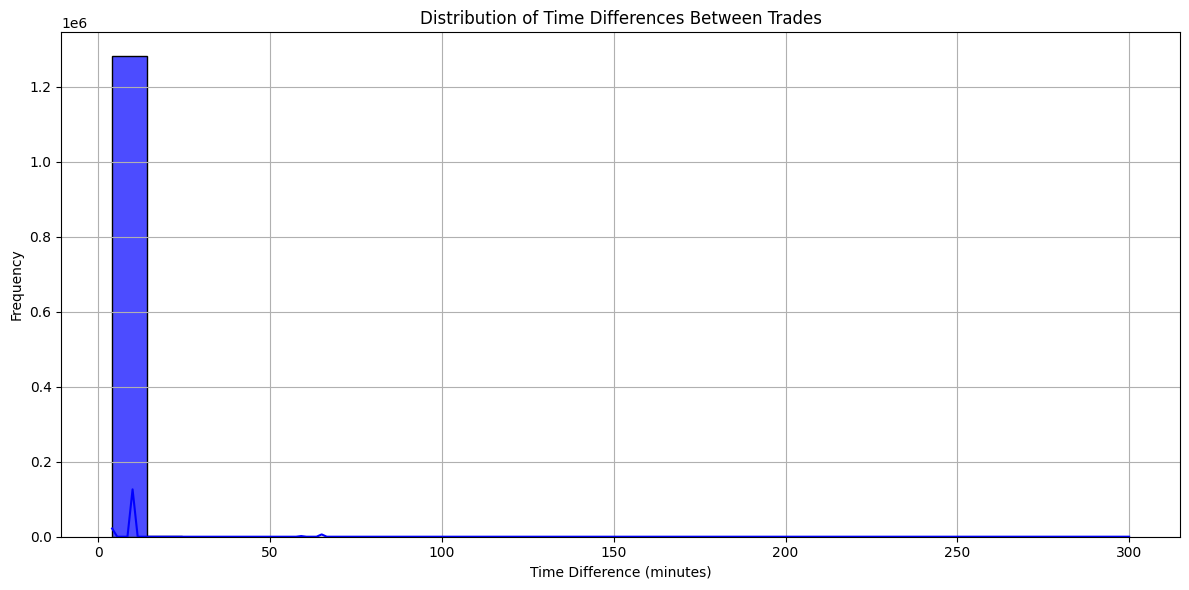

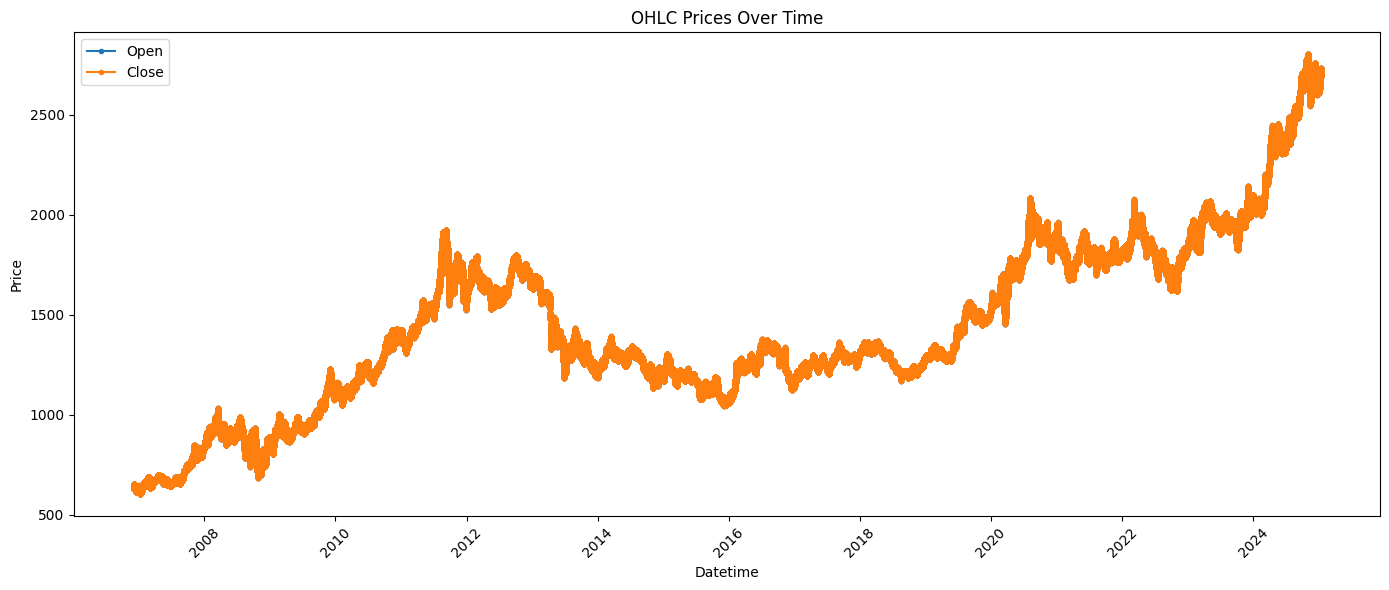

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ohlc(df):
    """
    Plots Open, High, Low, and Close prices over time.
    
    Args:
        df (pd.DataFrame): The DataFrame containing trading data.
    """
    plt.figure(figsize=(14, 6))
    plt.plot(df["DATETIME"], df["OPEN"], label="Open", linestyle='-', marker='o', markersize=3)
    # plt.plot(df["DATETIME"], df["HIGH"], label="High", linestyle='-', marker='o', markersize=3)
    # plt.plot(df["DATETIME"], df["LOW"], label="Low", linestyle='-', marker='o', markersize=3)
    plt.plot(df["DATETIME"], df["CLOSE"], label="Close", linestyle='-', marker='o', markersize=3)

    plt.title("OHLC Prices Over Time")
    plt.xlabel("Datetime")
    plt.ylabel("Price")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_timediff_histogram(df):
    """
    Plots a histogram of Time Differences (TIME_DIFF) to visualize distribution of trading gaps.

    Args:
        df (pd.DataFrame): The DataFrame containing trading data.
    """
    unique_time_diffs = df["TIME_DIFF"].nunique()
    print(unique_time_diffs)
    bin_count = min(unique_time_diffs, 50)  # Limit max bins to 50 for readability

    plt.figure(figsize=(12, 6))
    sns.histplot(df["TIME_DIFF"], bins=bin_count, kde=True, color="blue", alpha=0.7)

    plt.title("Distribution of Time Differences Between Trades")
    plt.xlabel("Time Difference (minutes)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the histogram plot for TIME_DIFF
plot_timediff_histogram(df)

# Run the plotting functions
plot_ohlc(df)
# plot_timediff(df)


Loading dataset from data/oro_transformed.parquet...

Data Quality Analysis Report

Missing Values per Column:
No missing values detected.

Total Duplicate Rows: 0

Potential Outliers using IQR Method:
{'Entries Per Day':        DATE_ONLY  Entries
0     2006-12-04      248
1     2006-12-05      254
2     2006-12-06      265
3     2006-12-07      252
4     2006-12-08      249
...          ...      ...
4750  2025-01-06      276
4751  2025-01-07      276
4752  2025-01-08      276
4753  2025-01-09      276
4754  2025-01-10      276

[4755 rows x 2 columns],
 'Entries Per Hour':     HOUR_ONLY  Entries
0           0    50491
1           1    55318
2           2    55687
3           3    55726
4           4    55584
5           5    55561
6           6    55614
7           7    55668
8           8    55827
9           9    55953
10         10    55926
11         11    55912
12         12    55934
13         13    55988
14         14    56044
15         15    56041
16         16    56037
17   

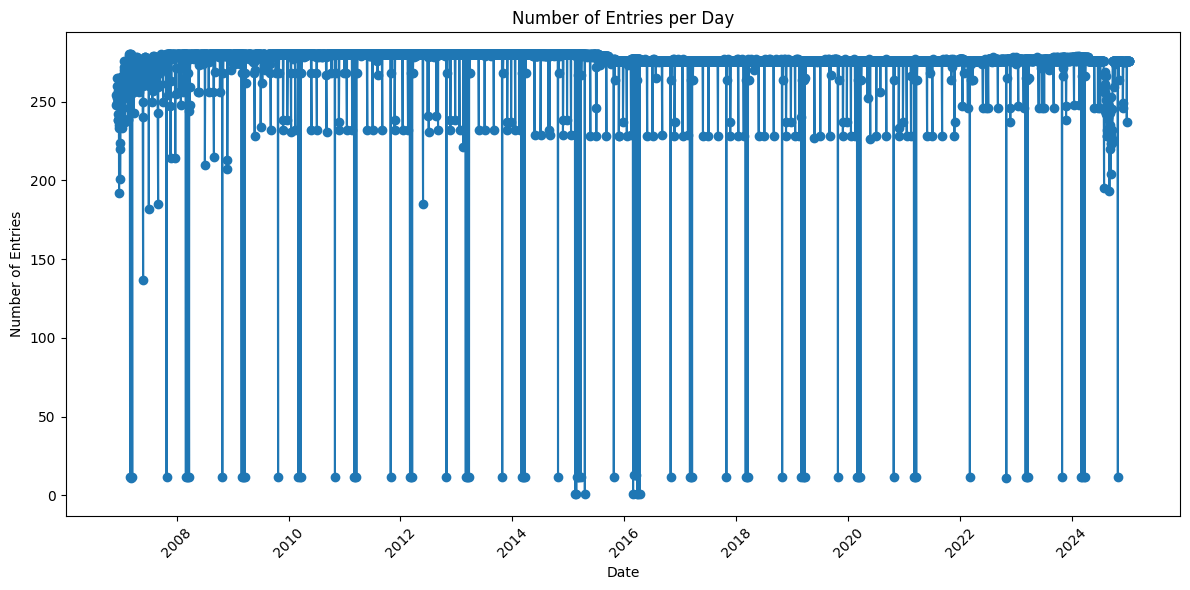

/tmp/ipykernel_79897/2343391664.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entries_per_hour, x='HOUR_ONLY', y='Entries', palette='viridis')


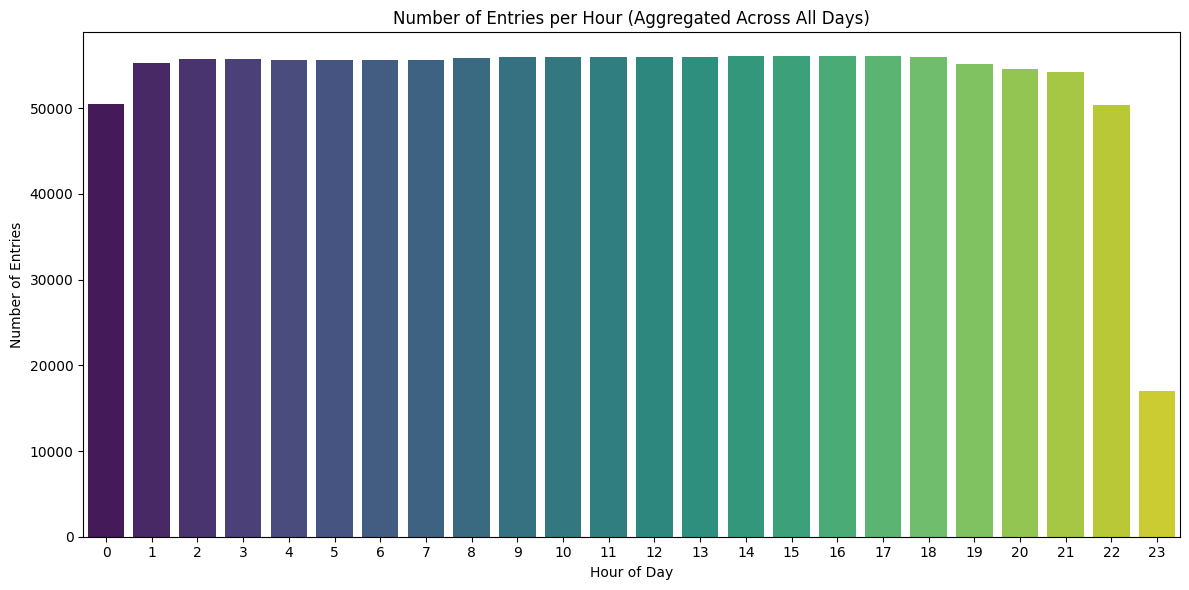

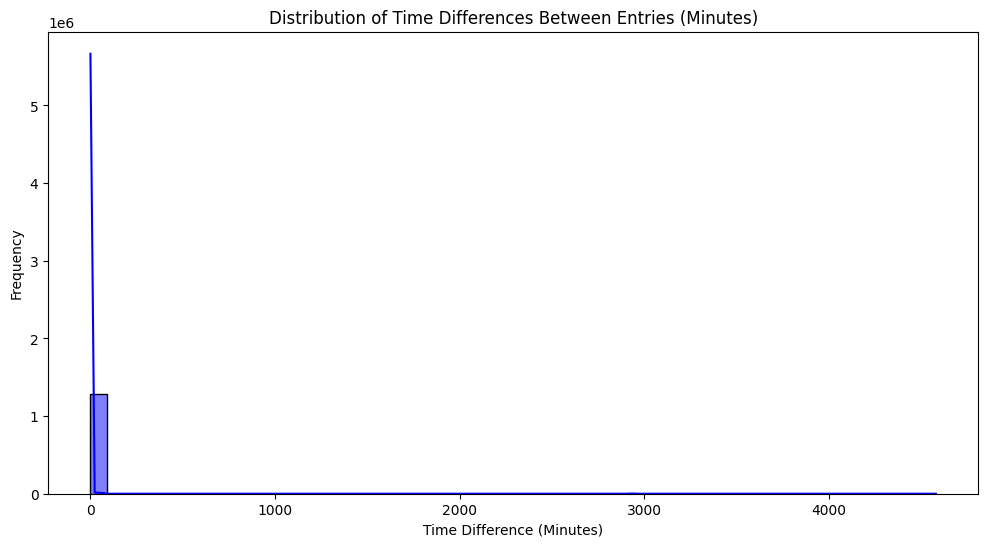

In [6]:

# Load the preprocessed Parquet file
file_path = "data/oro_transformed.parquet"
print(f"Loading dataset from {file_path}...")
df = pd.read_parquet(file_path)

# Ensure correct data types for analysis
numeric_cols = ["OPEN", "HIGH", "LOW", "CLOSE", "VOL", "OPENINT", "TIME_DIFF"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Extract date and hour for analysis
df['DATE_ONLY'] = df['DATETIME'].dt.date
df['HOUR_ONLY'] = df['DATETIME'].dt.hour

# --------------------------------
# 📝 DATA QUALITY ANALYSIS REPORT
# --------------------------------
print("\nData Quality Analysis Report")
print("=" * 60)

# 1. Missing Values Check
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0] if missing_values.any() else "No missing values detected.")

# 2. Duplicate Rows Check
duplicate_rows = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_rows}")

# 3. Outlier Detection (IQR Method)
print("\nPotential Outliers using IQR Method:")
outlier_counts = {}
for col in ["OPEN", "HIGH", "LOW", "CLOSE"]:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].shape[0]
    outlier_counts[col] = outliers

# 4. Volume Statistics
volume_stats = df["VOL"].describe()

# 5. Negative Values Check
negative_values = df[(df[numeric_cols] < 0).any(axis=1)]
negative_value_count = len(negative_values)

# 6. Time Continuity Check (Detect Gaps)
gaps = df[df["TIME_DIFF"] > 120]  # Gaps > 2 hours
time_gaps_summary = gaps.groupby('DATE_ONLY')["TIME_DIFF"].count().reset_index(name="Gap_Count")

# 7. Logical Consistency of Price Columns
logical_issues = df[
    (df["OPEN"] > df["HIGH"]) |
    (df["LOW"] > df["CLOSE"]) |
    (df["OPEN"] > df["CLOSE"]) |
    (df["LOW"] > df["HIGH"])
]
logical_issues_count = logical_issues.shape[0]

# 8. Number of Unique Trading Days
unique_days = df['DATE_ONLY'].nunique()

# 9. Entries per Day
entries_per_day = df.groupby('DATE_ONLY').size().reset_index(name='Entries')

# 10. Entries per Hour (Aggregated)
entries_per_hour = df.groupby('HOUR_ONLY').size().reset_index(name='Entries')

# Display results
analysis_results = {
    "Missing Values": missing_values,
    "Total Duplicate Rows": duplicate_rows,
    "Potential Outliers": outlier_counts,
    "Volume Statistics": volume_stats,
    "Negative Values Count": negative_value_count,
    "Logical Issues Count": logical_issues_count,
    "Unique Trading Days": unique_days,
    "Entries Per Day": entries_per_day,
    "Entries Per Hour": entries_per_hour,
    "Time Gaps Summary": time_gaps_summary
}
from pprint import pprint
pprint(analysis_results)
# --------------------------------
# 📊 DATA VISUALIZATION
# --------------------------------

# Plot Number of Entries per Day
plt.figure(figsize=(12, 6))
plt.plot(entries_per_day["DATE_ONLY"], entries_per_day["Entries"], marker='o', linestyle='-')
plt.title('Number of Entries per Day')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Number of Entries per Hour
plt.figure(figsize=(12, 6))
sns.barplot(data=entries_per_hour, x='HOUR_ONLY', y='Entries', palette='viridis')
plt.title('Number of Entries per Hour (Aggregated Across All Days)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Histogram of Time Differences
plt.figure(figsize=(12, 6))
sns.histplot(df["TIME_DIFF"], bins=50, kde=True, color='blue')
plt.title("Distribution of Time Differences Between Entries (Minutes)")
plt.xlabel("Time Difference (Minutes)")
plt.ylabel("Frequency")
plt.show()
